# <div style="text-align: center">Gmail Classification Models</div>

**Import Libraries**

In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Read Excel file**

In [2]:
#df = pd.read_excel(r'Downloads\All.xlsx')
df = pd.read_csv('dataset\mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#thêm cột label number với ham 0,spam 1
df['Label_Number'] = df['Category']
df.loc[df['Label_Number']=='ham','Label_Number',] = 0
df.loc[df['Label_Number']=='spam','Label_Number',] = 1
df.head()

,Category,Message,Label_Number
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
df.shape #kích thước tập dữ liệu

(5572, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      5572 non-null   object
 1   Message       5572 non-null   object
 2   Label_Number  5572 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


In [6]:
df.isna().sum() #kiểm tra giá trị thiếu

Category        0
Message         0
Label_Number    0
dtype: int64

In [7]:
df['Category'].value_counts() #số lượng dữ liệu với mỗi nhãn

ham     4825
spam     747
Name: Category, dtype: int64

**Count Plot - vẽ biểu đồ thể hiện số lượng dữ liệu**

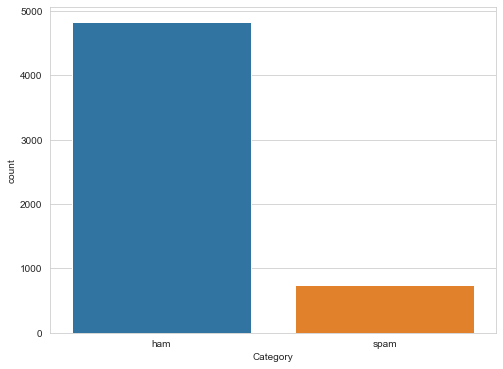

In [8]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Category');

**Đếm số lượng từ của mỗi dòng trong trường Text**

In [9]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)
df['count']=df['Message'].apply(count_words)
df.head()
#df['count']

,Category,Message,Label_Number,count
0,ham,"Go until jurong point, crazy.. Available only ...",0,24
1,ham,Ok lar... Joking wif u oni...,0,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,ham,U dun say so early hor... U c already then say...,0,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,15


In [10]:
df.groupby('Category').mean()

,count
Category,
ham,17.424663
spam,27.878179


**Tokenization**

In [11]:
%%time
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Trước khi cleaning:')
df.head()

Trước khi cleaning:
Wall time: 15.6 ms


,Category,Message,Label_Number,count
0,ham,"Go until jurong point, crazy.. Available only ...",0,24
1,ham,Ok lar... Joking wif u oni...,0,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,ham,U dun say so early hor... U c already then say...,0,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,15


In [12]:
print('Sau cleaning:')
df['Message'] = df['Message'].apply(lambda string: clean_str(string))
df.head()

Sau cleaning:


,Category,Message,Label_Number,count
0,ham,go until jurong point crazy available only in ...,0,24
1,ham,ok lar joking wif u oni,0,8
2,spam,free entry in a wkly comp to win fa cup final ...,1,37
3,ham,u dun say so early hor u c already then say,0,13
4,ham,nah i don t think he goes to usf he lives arou...,0,15


**Stemming words - loại bỏ 1 số ký tự nằm ở cuối từ**

In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['Message']=df['Message'].apply(stemming)
df.head()


,Category,Message,Label_Number,count
0,ham,go until jurong point crazy available only in ...,0,24
1,ham,ok lar joking wif u oni,0,8
2,spam,free entry in a wkly comp to win fa cup final ...,1,37
3,ham,u dun say so early hor u c already then say,0,13
4,ham,nah i don t think he goes to usf he lives arou...,0,15


In [14]:
X = df.loc[:, 'Message']
y = df.loc[:, 'Label_Number']

print(f"Kích thước tập đầu vào X: {X.shape}\nKích thước tập đầu ra y: {y.shape}")

Kích thước tập đầu vào X: (5572,)
Kích thước tập đầu ra y: (5572,)


**Chia dữ liệu thành Training data và Test data dùng Split**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [16]:
print(f"Kích thước Training Data : {X_train.shape}\nKích thước Test Data: {X_test.shape}")

Kích thước Training Data : (3900,)
Kích thước Test Data: (1672,)


**Dùng Count Vectorization trích rút Features từ Text**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv= TfidfVectorizer(min_df = 1)
cv.fit(X_train) #Học tạo ra danh sách từ vừng

TfidfVectorizer()

In [18]:
print('Số lượng từ vựng: ',len(cv.vocabulary_.keys()))

Số lượng từ vựng:  6423


In [19]:
dtv = cv.transform(X_train) #chuyển đổi tài liệu thành ma trận document-term
#type(dtv)
#lưu cv
pickle.dump(cv, open("vectorizer.pkl","wb"))

In [20]:
dtv = dtv.toarray()
#dtv

In [21]:
print(f"Số dòng dữ liệu đầu vào để Train: {dtv.shape[0]}\nSố lượng Features: {dtv.shape[1]}")

Số dòng dữ liệu đầu vào để Train: 3900
Số lượng Features: 6423


**Áp dụng 7 thuật toán tạo model cho tập Train **

In [22]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)
    duration = perf_counter() - start #tính giờ train
    duration = round(duration,3)#làm tròn
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")


Random Forest        trained in 19.467 sec
MultinomialNB        trained in 0.074 sec
Logistic Regr.       trained in 0.204 sec
KNN                  trained in 0.043 sec
Decision Tree        trained in 17.505 sec
SVM (Linear)         trained in 0.171 sec
SVM (RBF)            trained in 28.64 sec
Wall time: 1min 6s


In [23]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Số dòng dữ liệu để test: {test_dtv.shape[0]}\nSố lượng Features tập X test: {test_dtv.shape[1]}")

Số dòng dữ liệu để test: 1672
Số lượng Features tập X test: 6423


**Test Accuracy and Training Time**

In [24]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [25]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,SVM (Linear),0.982057,0.171
1,SVM (RBF),0.974880,28.640
2,Random Forest,0.970694,19.467
3,Logistic Regr.,0.966507,0.204
4,KNN,0.962321,0.043
5,MultinomialNB,0.959330,0.074
6,Decision Tree,0.956938,17.505


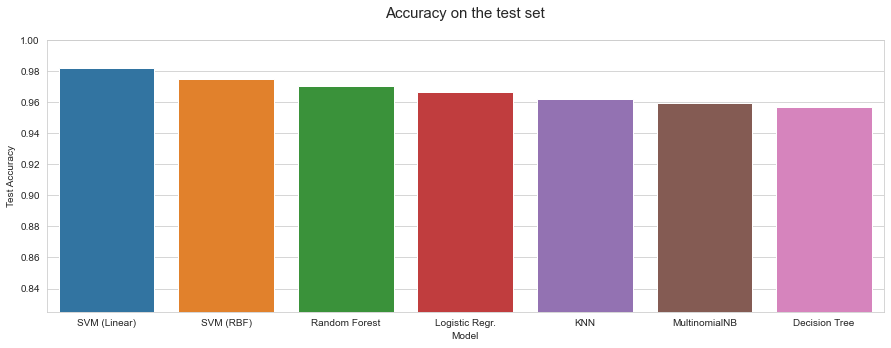

In [26]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

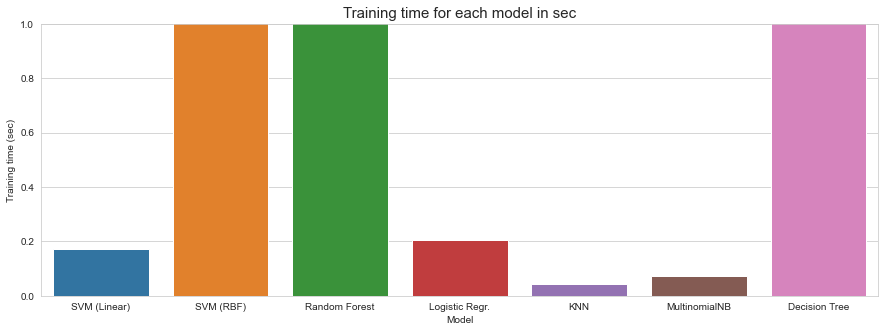

In [27]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()

## **Logistic Regression**<br>

In [28]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred = lr.predict(test_dtv)
pickle.dump(lr, open("models/logistic.pkl","wb"))


Wall time: 220 ms


In [29]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.65071770334929


**Classification Report**

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1455
           1       0.98      0.76      0.85       217

    accuracy                           0.97      1672
   macro avg       0.97      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



**Confusion Matrix**

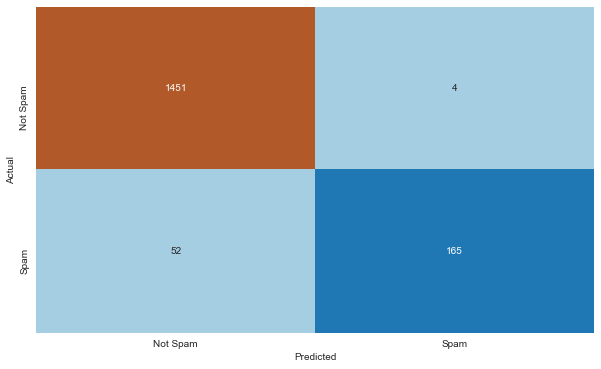

In [31]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Support Vector Machine (RBF)**<br>

In [32]:
%%time
svc = SVC()
svc.fit(dtv, y_train)
pred = svc.predict(test_dtv)
pickle.dump(svc, open("models/svc.pkl","wb"))

Wall time: 1min 51s


In [33]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.48803827751196


**Classification Report**

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1455
           1       0.98      0.82      0.89       217

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.97      0.97      1672



**Confusion Matrix**

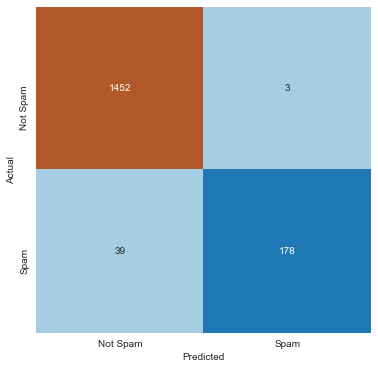

In [35]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Random Forest Classifier**<br>

In [36]:
%%time
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred = rfc.predict(test_dtv)
pickle.dump(rfc, open("models/random.pkl","wb"))

Wall time: 21.7 s


In [37]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.30861244019138


**Classification Report**

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1455
           1       0.99      0.80      0.89       217

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



**Confusion Matrix**

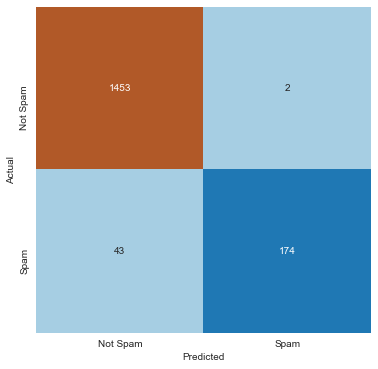

In [39]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Multinomial Naive Bayes** <br>

In [40]:
%%time
mnb = MultinomialNB()
mnb.fit(dtv, y_train)
pred = mnb.predict(test_dtv)
pickle.dump(mnb, open("models/mnb.pkl","wb"))

Wall time: 111 ms


In [41]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.93301435406698


**Classification Report**

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1455
           1       1.00      0.69      0.81       217

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672



**Confusion Matrix**

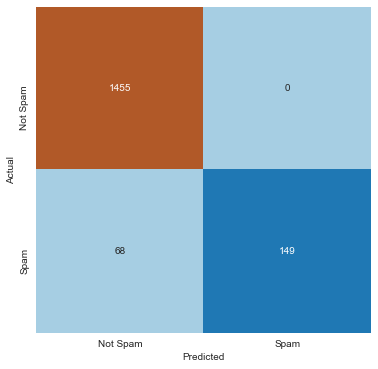

In [43]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Support Vector Machine (Linear)** <br>

In [44]:
%%time
lsvc = LinearSVC()
lsvc.fit(dtv, y_train)
pred = lsvc.predict(test_dtv)
pickle.dump(lsvc, open("models/linearsvc.pkl","wb"))

Wall time: 197 ms


In [45]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  98.20574162679426


**Classification Report**

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1455
           1       0.97      0.88      0.93       217

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



**Confusion Matrix**

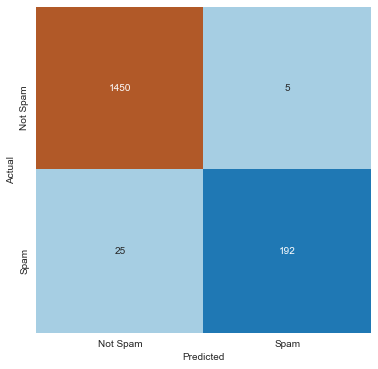

In [47]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **Decision Tree Classifier** <br>

In [48]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred = dtc.predict(test_dtv)
pickle.dump(dtc, open("models/tree.pkl","wb"))

Wall time: 14.4 s


In [49]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.75358851674642


**Classification Report**

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1455
           1       0.88      0.77      0.83       217

    accuracy                           0.96      1672
   macro avg       0.93      0.88      0.90      1672
weighted avg       0.96      0.96      0.96      1672



**Confusion Matrix**

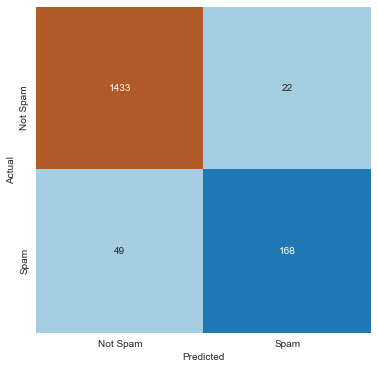

In [51]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## **K Nearest Neighbours**<br>

In [52]:
%%time
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred = knn.predict(test_dtv)
pickle.dump(knn, open("models/knn.pkl","wb"))

Wall time: 5.73 s


In [53]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.23205741626795


**Classification Report**

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1455
           1       0.98      0.73      0.83       217

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



**Confusion Matrix**

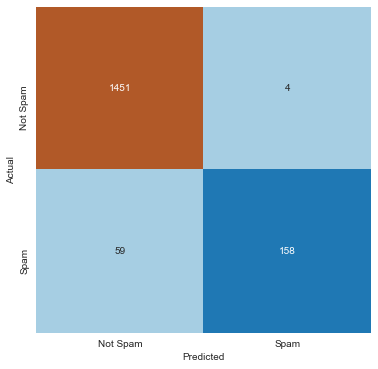

In [55]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


